# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | susuman
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | jinchang
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | choibalsan
Processing Record 20 of Set 1 | argostolion
Processing Record 21 of Set 1 | naduvattam
Processing Record 22 of Set 1 | yellowknife
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,28.55,79,40,4.12,EC,1712864827
1,tralee,52.2704,-9.7026,12.27,96,100,3.54,IE,1712864869
2,port-aux-francais,-49.3500,70.2167,5.84,93,99,5.44,TF,1712864870
3,port mathurin,-19.6833,63.4167,27.06,76,2,4.40,MU,1712864870
4,grytviken,-54.2811,-36.5092,-0.44,73,19,5.43,GS,1712864824


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")


In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,28.55,79,40,4.12,EC,1712864827
1,tralee,52.2704,-9.7026,12.27,96,100,3.54,IE,1712864869
2,port-aux-francais,-49.3500,70.2167,5.84,93,99,5.44,TF,1712864870
3,port mathurin,-19.6833,63.4167,27.06,76,2,4.40,MU,1712864870
4,grytviken,-54.2811,-36.5092,-0.44,73,19,5.43,GS,1712864824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

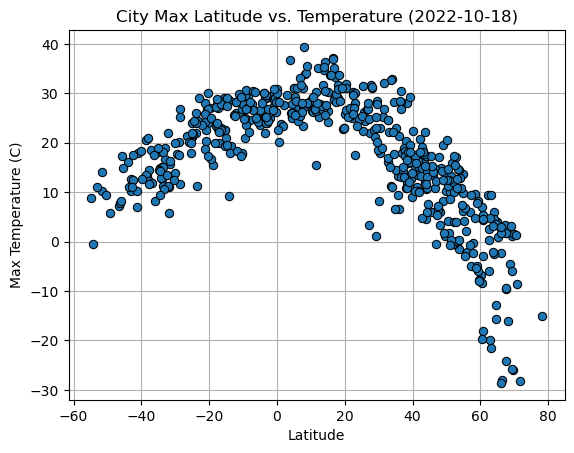

In [9]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

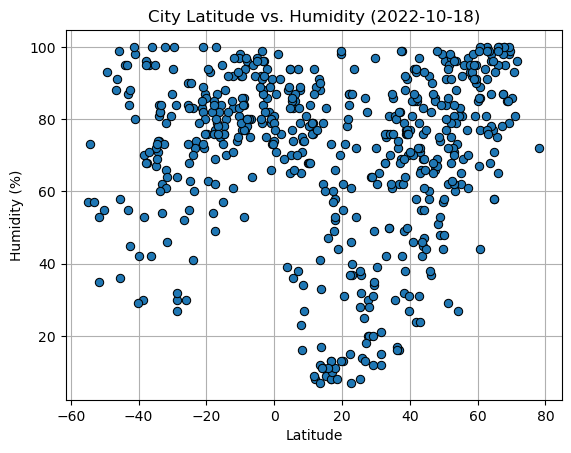

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

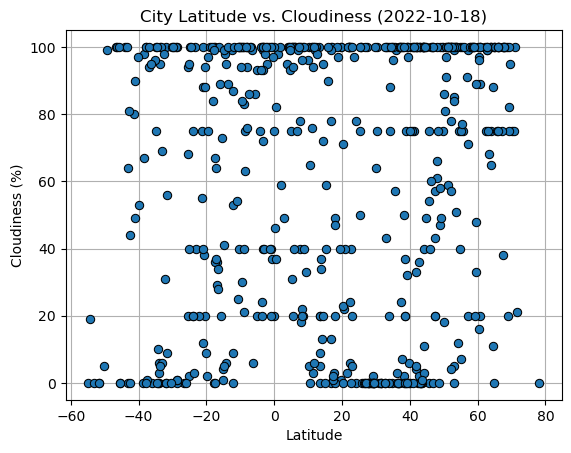

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

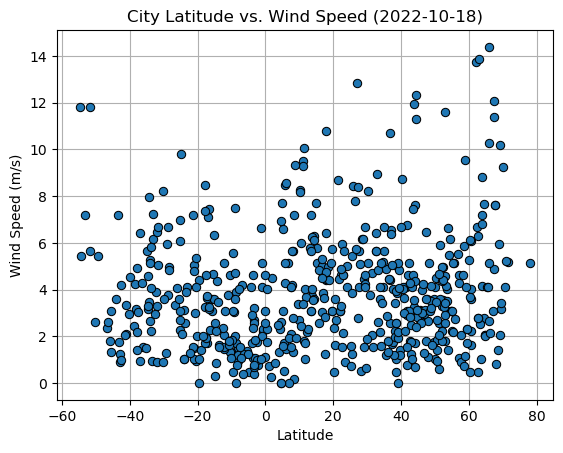

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tralee,52.2704,-9.7026,12.27,96,100,3.54,IE,1712864869
5,susuman,62.7833,148.1667,-20.01,100,99,0.45,RU,1712864870
8,college,64.8569,-147.8028,3.93,58,100,2.06,US,1712864870
9,jamestown,42.0970,-79.2353,20.77,85,100,4.63,US,1712864871
11,longyearbyen,78.2186,15.6401,-15.09,72,0,5.14,SJ,1712864871


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,28.55,79,40,4.12,EC,1712864827
2,port-aux-francais,-49.3500,70.2167,5.84,93,99,5.44,TF,1712864870
3,port mathurin,-19.6833,63.4167,27.06,76,2,4.40,MU,1712864870
4,grytviken,-54.2811,-36.5092,-0.44,73,19,5.43,GS,1712864824
6,karratha,-20.7377,116.8463,26.86,72,38,3.00,AU,1712864845


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7164145696246781


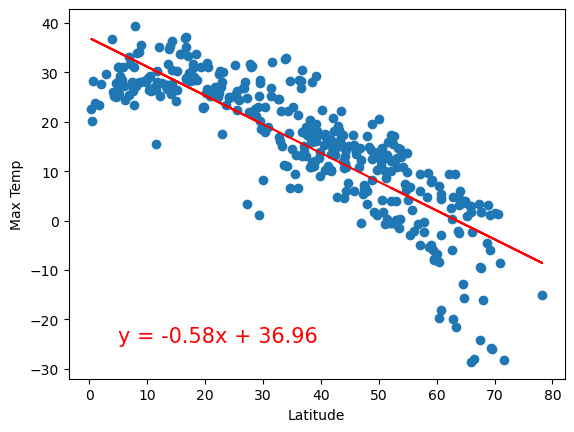

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6543722053494165


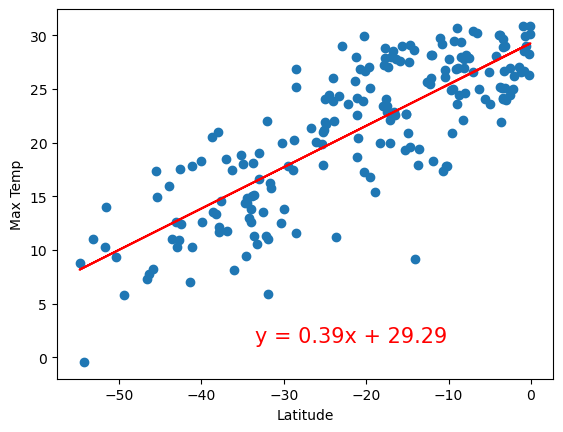

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** The northern value is 0.7164, while the southern is 0.6543.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11538285104661909


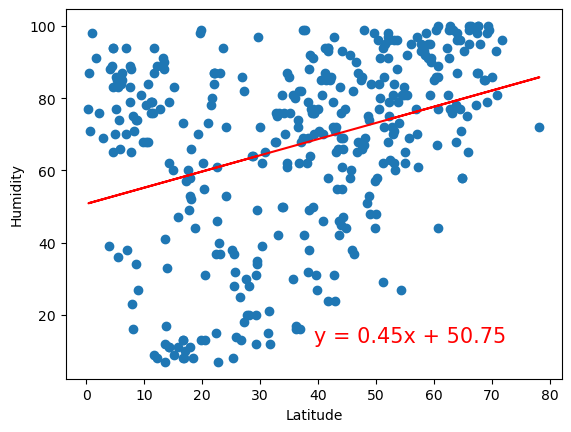

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.11538285104661909


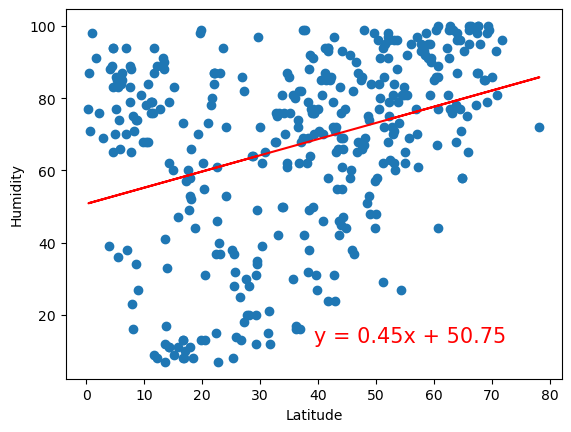

In [20]:
# Southern Hemisphere
x_value = southern_hemi_df ["Lat"]
y_value = southern_hemi_df ["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** The northern is 0.115 while the southern is 0.115 which makes them equal. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02121459443284165


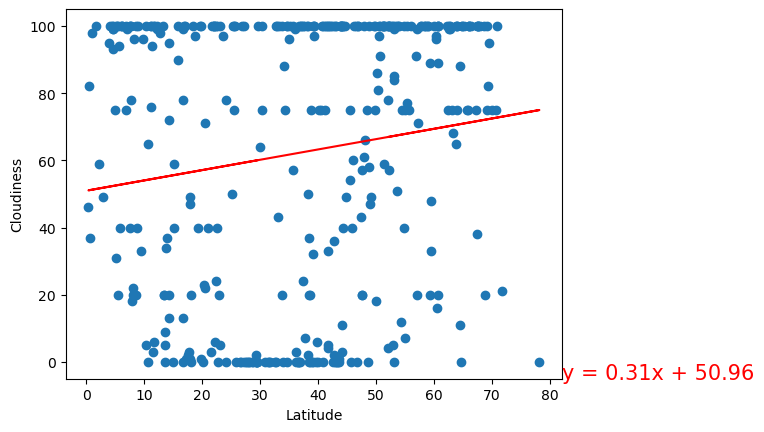

In [37]:
# Northern Hemisphere
x_value = northern_hemi_df ["Lat"]
y_value = northern_hemi_df ["Cloudiness"]
linear_regression(x_values, y_value, 1, 0)

The r-value is: 0.06378422544659479


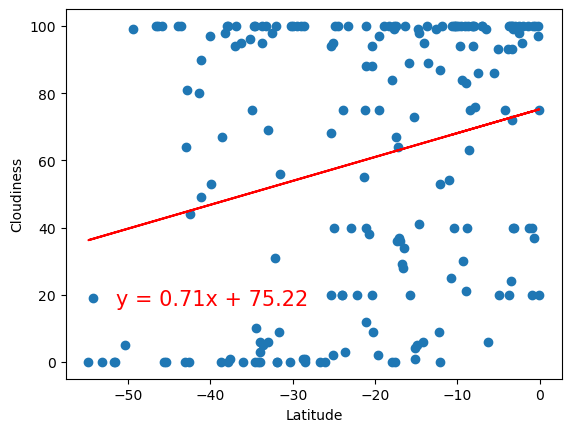

In [39]:
# Southern Hemisphere
x_value = southern_hemi_df ["Lat"]
y_value = southern_hemi_df ["Cloudiness"]
linear_regression(x_value, y_value, 0.1, 0.2 )

**Discussion about the linear relationship:** The northern is 0.021, while the southern is, 0.063 which makes the souther higher. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0038712765499087825


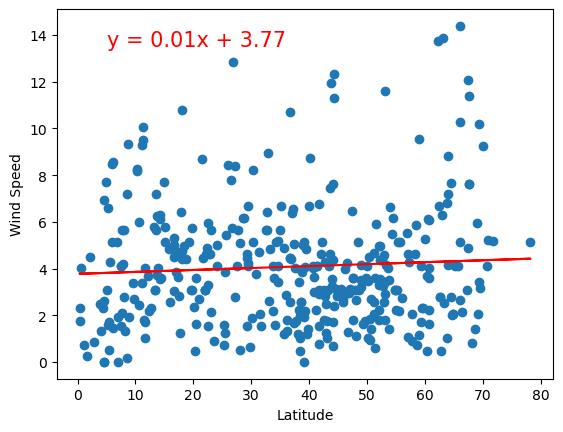

In [43]:
# Northern Hemisphere
x_value = northern_hemi_df ["Lat"]
y_value = northern_hemi_df ["Wind Speed"]
linear_regression(x_value, y_value, 0.1, 0.9)

The r-value is: 0.10459619584781323


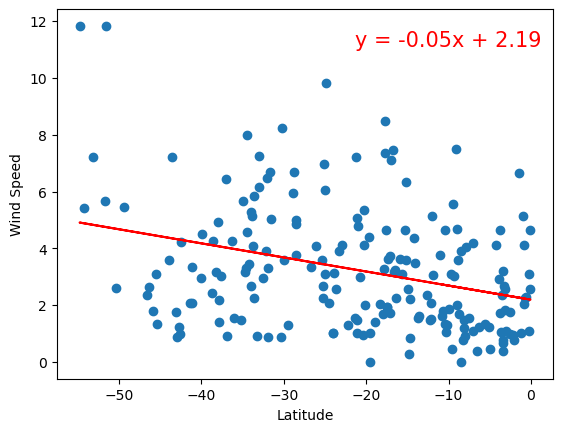

In [47]:
# Southern Hemisphere
x_value = southern_hemi_df ["Lat"]
y_value = southern_hemi_df ["Wind Speed"]
linear_regression(x_value, y_value, 0.6, 0.9)

**Discussion about the linear relationship:** The northern is 0.0038 while the southern is , 0.104 which makes the southern higher. 